# DS-SF-27 | Codealong 16 | Introduction to Natural Language Processing

## >>> One-time setup

In [1]:
import nltk
nltk.__path__

['/usr/local/lib/python3.5/site-packages/nltk']

In [3]:
from nltk.book import *
text1

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<Text: Moby Dick by Herman Melville 1851>

## <<< One-time setup

In [26]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import string
import unicodedata
from nltk import tokenize, corpus, stem
from nltk.tokenize import wordpunct_tokenize

from sklearn import feature_extraction, linear_model, ensemble, model_selection, metrics, decomposition

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Tokenization

In [64]:
def tokenize_text(document):
#     document = document.encode('utf-8')

    # Convert text to lowercase
    document = document.lower()

    # Tokenize
    tokens = tokenize.word_tokenize(document)

    # Remove punctuation in tokens and then remove empty tokens
    # make translation table
    translate_table = dict((ord(char), None) for char in string.punctuation)   
    tokens = [token.translate(translate_table) for token in tokens]
    tokens = [token for token in tokens if token]

    # Remove stop words
    tokens = [token for token in tokens if not token in corpus.stopwords.words('english')]

    return tokens

In [65]:
tokens = tokenize_text("This is a sentence...  Wait, here's another.  And a third!")

tokens

['sentence', 'wait', 'another', 'third']

## Stemming

In [66]:
class Stemmer:
    stemmer = stem.porter.PorterStemmer()

    @staticmethod
    def stem_tokens(tokens):
        return [Stemmer.stemmer.stem(token) for token in tokens]

In [67]:
tokens = Stemmer.stem_tokens(tokens)

tokens

['sentenc', 'wait', 'anoth', 'third']

## Book reviews

Below, we will be analyzing a partial list of the reviews for J.K. Rowling's The Casual Vacancy.  (https://www.amazon.com/dp/0316228532)

Our dataset is a subset of http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Books_5.json.gz.

In [68]:
df = pd.read_csv(os.path.join('..', 'datasets', 'reviews_Books_5-0316228532.csv'))

In [69]:
df

,asin,reviewer_id,reviewer_name,summary,review_text,overall,review_time,unix_review_time,helpful
0,316228532,AY2UIGHCB4VPB,NaN,but a good read!,"A departure for her, but a good read!",5,"07 12, 2014",1405123200,"[0, 0]"
1,316228532,A2L17U0TWH9UWS,1075,Not worth the time,I had a hard time remembering who each charact...,2,"11 12, 2013",1384214400,"[0, 1]"
2,316228532,A2R63TBVG5OAF6,12121,The Casual Vacancy,This is the only review I have ever written. ...,1,"10 1, 2012",1349049600,"[13, 25]"
3,316228532,ACU39L9G696US,123esmo,Expecting more from J.K. Rowling,"I was expecting more from J.K. Rowling, it's a...",2,"01 10, 2013",1357776000,"[0, 1]"
4,316228532,A3N7KY1PBMF880,&#34;Bad Cat!&#34;,Sorry That I Bought It.,As big a fan as I am of J K Rowling's Harry Po...,1,"05 11, 2013",1368230400,"[0, 3]"
...,...,...,...,...,...,...,...,...,...
2045,316228532,A1SCYWLS37YR50,ZC,Spectacular prose in a rambling story,Spectacular prose in a rambling story that see...,5,"02 12, 2014",1392163200,"[1, 1]"
2046,316228532,A1POFVVXUZR3IQ,Z Hayes,"Difficult to get into, but has its moments",Although I am a great fan of the Harry Potter ...,3,"07 18, 2013",1374105600,"[1, 1]"
2047,316228532,A1YSU2VSUJZAR5,zolteg59,The Casual Vacancy,"While the story was intriguing, and I am a hug...",1,"11 11, 2012",1352592000,"[0, 1]"
2048,316228532,A2ZF888HX9YR8E,Zoobeefoo,A better read for Brits perhaps?,What an odd book! The adolescent characters a...,3,"12 30, 2012",1356825600,"[2, 3]"


In [70]:
df.drop(['asin', 'reviewer_id', 'reviewer_name', 'summary', 'review_time', 'unix_review_time', 'helpful'],
    axis = 1,
    inplace = True)

In [71]:
df

,review_text,overall
0,"A departure for her, but a good read!",5
1,I had a hard time remembering who each charact...,2
2,This is the only review I have ever written. ...,1
3,"I was expecting more from J.K. Rowling, it's a...",2
4,As big a fan as I am of J K Rowling's Harry Po...,1
...,...,...
2045,Spectacular prose in a rambling story that see...,5
2046,Although I am a great fan of the Harry Potter ...,3
2047,"While the story was intriguing, and I am a hug...",1
2048,What an odd book! The adolescent characters a...,3


In [72]:
df.overall.value_counts(dropna = False)

4    464
5    457
3    397
2    373
1    359
Name: overall, dtype: int64

In [75]:
# TODO
X=df['review_text']
c=df['overall']

## Train/test sets

In [76]:
train_X, test_X, train_c, test_c = model_selection.train_test_split(X, c, train_size = .6, random_state = 0)

## TF-IDF and `TfidfVectorizer`

In [125]:
# TODO
# vectorizer = feature_extraction.text.TfidfVectorizer(stop_words = 'english')

class CustomTokenizer(object):
    def __init__(self):
        self.stemmer = stem.porter.PorterStemmer()

    def __call__(self, document):
        tokens = tokenize_text(document)
        tokens = Stemmer.stem_tokens(tokens)
        return tokens

vectorizer = feature_extraction.text.TfidfVectorizer(tokenizer = CustomTokenizer(), ngram_range = (1, 3), min_df = 3)

vectorizer.fit(train_X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<__main__.CustomTokenizer object at 0x11745a7f0>,
        use_idf=True, vocabulary=None)

## Bag-of-words

In [126]:
vectorizer.get_feature_names()

['1',
 '1 star',
 '10',
 '10 book',
 '100',
 '100 page',
 '12',
 '12 star',
 '13',
 '14',
 '15',
 '150',
 '150 page',
 '16',
 '17',
 '1799',
 '18',
 '180',
 '1st',
 '1star',
 '1star review',
 '2',
 '2 star',
 '20',
 '200',
 '200 page',
 '2012',
 '22',
 '23',
 '25',
 '3',
 '3 4',
 '3 chapter',
 '3 star',
 '30',
 '34',
 '34 34',
 '34 adult',
 '34 adult 34',
 '34 casual',
 '34 casual vacanc',
 '34 charact',
 '34 could',
 '34 enjoy',
 '34 good',
 '34 harri',
 '34 harri potter',
 '34 jk',
 '34 novel',
 '34 plot',
 '34 real',
 '34 town',
 '34 vacanc',
 '34 vacanc 34',
 '34 word',
 '35',
 '35 star',
 '4',
 '4 5',
 '4 5 star',
 '4 letter',
 '4 star',
 '4 star instead',
 '4 time',
 '40',
 '400',
 '400 page',
 '45',
 '5',
 '5 star',
 '50',
 '50 page',
 '500',
 '500 page',
 '512',
 '512 page',
 '6',
 '6 month',
 '60',
 '60 page',
 '62',
 '7',
 '70',
 '8',
 '80',
 '8217',
 '8220',
 '8221',
 '90',
 'abandon',
 'abbey',
 'abil',
 'abil creat',
 'abil weav',
 'abl',
 'abl get',
 'abl keep',
 'abl put

## Transform the feature matrix `X`

In [127]:
# TODO
Xtrain = vectorizer.transform(train_X)
Xtest = vectorizer.transform(test_X)

## Machine Learning Modeling

> # TODO...

In [128]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [129]:
logreg = LogisticRegressionCV()
logreg.fit(Xtrain, train_c)
print(accuracy_score(test_c, logreg.predict(Xtest)))

0.707317073171


In [130]:
# with mapping
X = df.review_text
c = df.overall.map({1: -1, 2: -1, 3: 0, 4: 1, 5: 1})
train_X, test_X, train_c, test_c = model_selection.train_test_split(X, c, train_size = .6, random_state = 42)
Xtrain = vectorizer.transform(train_X)
Xtest = vectorizer.transform(test_X)

In [132]:
logreg = LogisticRegressionCV(n_jobs=-1)
logreg.fit(Xtrain, train_c)
print(accuracy_score(test_c, logreg.predict(Xtest)))
pd.crosstab(logreg.predict(Xtest), test_c, rownames=['predicted'], colnames=['true'])

0.707317073171


true,-1,0,1
predicted,,,
-1,234,44,25
0,16,15,14
1,50,91,331


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [133]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
params = {'n_estimators':[200,300], 'max_depth':[8,12]}
grid=GridSearchCV(rf, params, cv=5)
grid.fit(Xtrain, train_c)
grid.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [134]:
grid.best_score_

0.6300813008130082

In [138]:
print(accuracy_score(test_c, grid.predict(Xtest)))
pd.crosstab(grid.predict(Xtest), test_c, rownames=['predicted'], colnames=['true'])

0.639024390244


true,-1,0,1
predicted,,,
-1,215,36,47
0,26,29,43
1,59,85,280


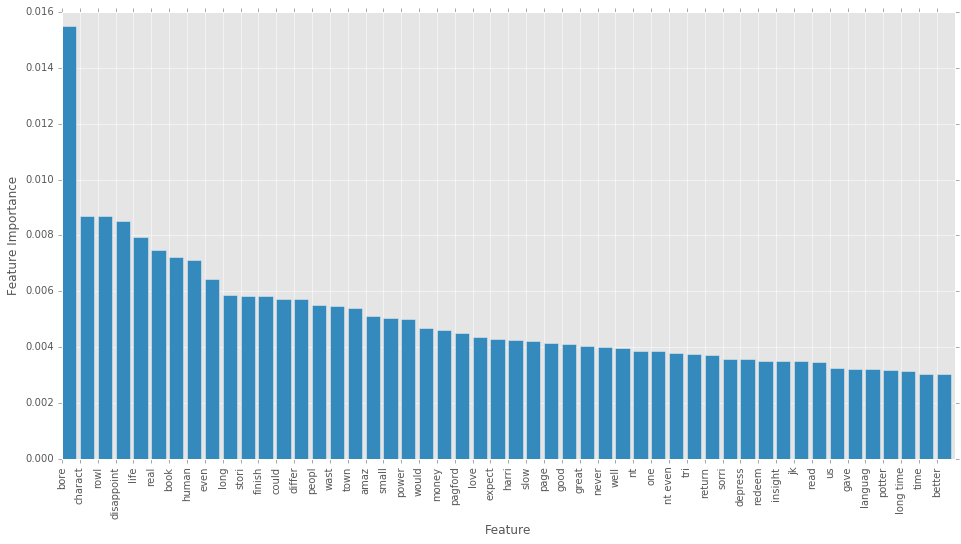

In [137]:
feature_importances = sorted(zip(grid.best_estimator_.feature_importances_, vectorizer.get_feature_names()), reverse = True)
feature_importances = feature_importances[:50]
plt.figure(figsize = (16, 8))

plt.bar(
    range(len(feature_importances)),
    [feature_importance[0] for feature_importance in feature_importances]
)

plt.xticks(
    range(len(feature_importances)),
    [feature_importance[1] for feature_importance in feature_importances],
    rotation = 90
)

plt.xlabel('Feature')
plt.ylabel('Feature Importance')